In [1]:


import numpy as np 
import pandas as pd 

import os


In [2]:
# !pip install tensorflow-macos==2.9

# !pip install tensorflow-metal==0.5.0
# !pip install numpy  --upgrade
# !pip install pandas  --upgrade
# !pip install matplotlib  --upgrade
# !pip install scikit-learn  --upgrade

In [3]:
import sys
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.3-arm64-arm-64bit
Tensor Flow Version: 2.9.0
Keras Version: 2.9.0

Python 3.9.16 (main, Jan 11 2023, 10:02:19) 
[Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.2
GPU is available


In [4]:
# Load Data
import cv2

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [5]:
os.listdir('/Users/akashravi/Desktop/Hand_Gesture_Detection/asl_alphabet_train/')

['.DS_Store',
 'R',
 'U',
 'I',
 'N',
 'G',
 'Z',
 'T',
 'S',
 'A',
 'F',
 'O',
 'H',
 'del',
 'nothing',
 'space',
 'M',
 'J',
 'C',
 'D',
 'V',
 'Q',
 'X',
 'E',
 'B',
 'K',
 'L',
 'Y',
 'P',
 'W']

In [6]:
train_dir = '/Users/akashravi/Desktop/Hand_Gesture_Detection/asl_alphabet_train/'
test1_dir = '/Users/akashravi/Desktop/Hand_Gesture_Detection/asl_alphabet_test/'
test2_dir = '/Users/akashravi/Desktop/Hand_Gesture_Detection/asl_alphabet_train/'


In [7]:
A_test_path = test1_dir + 'A_test.jpg'

In [8]:
train_list = os.listdir(train_dir)[1:]
test1_list = os.listdir(test1_dir)
test2_list = os.listdir(test2_dir)[1:]
train_list

['R',
 'U',
 'I',
 'N',
 'G',
 'Z',
 'T',
 'S',
 'A',
 'F',
 'O',
 'H',
 'del',
 'nothing',
 'space',
 'M',
 'J',
 'C',
 'D',
 'V',
 'Q',
 'X',
 'E',
 'B',
 'K',
 'L',
 'Y',
 'P',
 'W']

In [9]:
classes_map = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [10]:
def get_data(direc):
    images = []
    labels = []
    train_list = os.listdir(direc)[1:]
    for i in train_list:
        print(i,end = " ")
        for image in os.listdir(direc + i):
            img = cv2.imread(direc + i + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(classes_map.index(i))
    print("\nimages read successfully")
    return images, labels

In [11]:
X, Y = get_data(train_dir)      

R U I N G Z T S A F O H del nothing space M J C D V Q X E B K L Y P W 
images read successfully


In [12]:
len(X), len(Y)

(87000, 87000)

<Figure size 640x480 with 0 Axes>

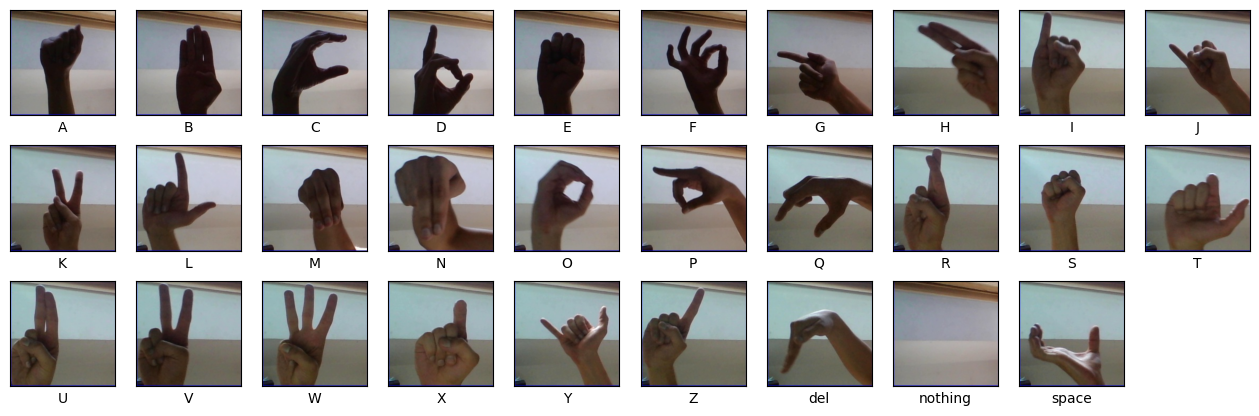

In [13]:
def plot_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "{0}/{0}1.jpg".format(classes_map[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes_map[i])
        
plot_images()

In [14]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, Y)

In [15]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [ ]:
classes = 29
batch = 32
epochs = 15
learning_rate = 0.001

In [17]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-03 08:39:08.477232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-03 08:39:08.477941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
adam = Adam(learning_rate = learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                        

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch, epochs = epochs, validation_split = 0.2, shuffle = True, verbose = 1)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Test accuracy: 0.9841379523277283
Test loss: 0.05067423731088638


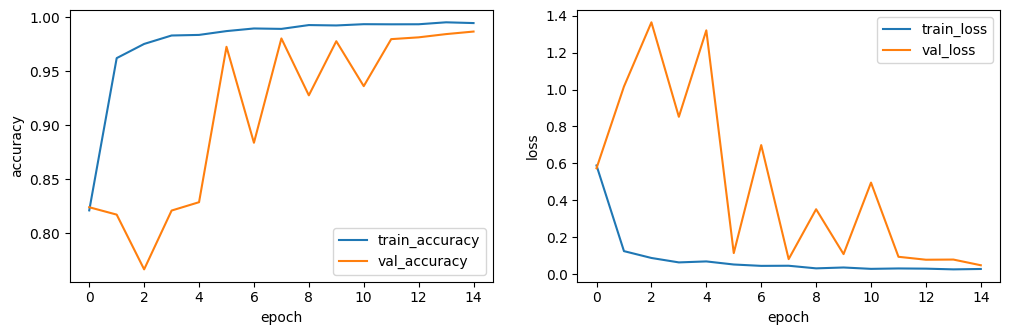

In [ ]:
def plot_results(model):

    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()


    
plot_results(model)

In [ ]:
#unseen data seperate dataset
X_test2, Y_test2 = get_data(test2_dir)
#X_test1, Y_test1 = get_data(test1_dir)


R U I N G Z T S A F O H del nothing space M J C D V Q X E B K L Y P W 
images read successfully


In [ ]:
X_test = np.array(X_test2) / 255.0
len(X_test)

87000

In [ ]:
Y_test = utils.to_categorical(Y_test2)
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
_test_loss, _test_acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy:', _test_acc)
print('Test loss:', _test_loss)

Test accuracy: 0.987298846244812
Test loss: 0.0430268831551075


In [ ]:
model.save('model_hand_gesture.h5')